In [ ]:
import csv
import pandas as pd
import seaborn as sns

      Product_id                           Product_name  Price  Stock
0  5901559146001            Raduga Piwo Leon But. 0,50L  10.99     45
1  5010134916684  Birbant Piwo Imperial Citra Ipa 0,50L  10.99     72
2  5099873089798      Moczybroda Piwo Jack Mangow 0,50L  10.99     12
3  5010677714006       Pinta Piwo Modern Drinking 0,50L   9.99     39
4  5900343001915          Pinta Piwo Atak Chmielu 0,50L   8.99     64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    57 non-null     int64  
 1   Product_name  57 non-null     object 
 2   Price         57 non-null     float64
 3   Stock         57 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.9+ KB
None


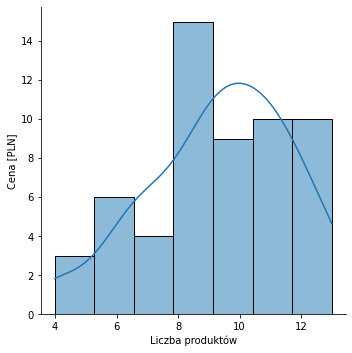

In [ ]:
produkty = pd.read_csv("/content/Products.csv")
print(produkty.head(5))
print(produkty.info())
g = sns.displot(data = produkty, x = "Price", kde=True)
g.set_axis_labels("Liczba produktów", "Cena [PLN]")

In [ ]:
class Produkt:

  def __init__(self, id, nazwa, cena, stock):
    self.__id = id
    self.__nazwa = nazwa
    self.__cena = str(cena)
    self.__stock = stock

  def NowyProdukt(self):
    self.__id = input("Wprowadź ID produktu : ")
    self.__nazwa = input("Wprowadź nazwę : ")
    self.__cena = float(input("Wprowadź cenę : "))
    self.__stock = int(input("Wprowadź stock : "))

  def Wyswietl(self):
    print(self.__id, self.__nazwa, self.__cena, self.__stock)

  def WyszukajID(self, id):
    if self.__id == id:
      return True
    else:
      return False

  def WyszukajNazwa(self, nazwa):
    if self.__nazwa == nazwa:
      return True
    else:
      return False

  def Sprzedaz(self):
    print("Obecny stan magazynowy produktu:", self.__stock)
    q = int(input("Wpisz liczbę sprzedanych sztuk:"))
    if(int(self.__stock) >= q):
      amt = int(self.__stock) - q
      print("Nowy stan:", amt)
      self.__stock = amt
    else:
      print("Za mała dostępność")

  def Dodanie(self):
    print("Obecny stan magazynowy produktu:", self.__stock)
    q = int(input("Wprowadź liczbę produktów do dodania:"))
    amt = int(self.__stock) + q
    print("Nowy stan:", amt)
    self.__stock = amt

  def ProduktyDoKrotki(self):
    return (self.__id, self.__nazwa, self.__cena, self.__stock)


l = []

with open("/content/Products.csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        l.append(Produkt(row[0], row[1], row[2], row[3]))

while True:
    print("Menu\n1]Wyświetl wszystkie produkty\n2]Wyszukaj po ID\n3]Wyszukaj po nazwie\n4]Sprzedaż\n5]Dostawa\n6]Dodanie nowego produktu\n7]Zapisanie zmian do pliku\n8]Wyjście")
    try:
      ch = int(input("Wybierz opcję "))
      if ch == 1:
          for c in l:
            c.Wyswietl()

      elif ch == 2:
          id = input("Wprowadź ID: ")
          found = False
          for c in l:
              found = c.WyszukajID(id)
              if found:
                  c.Wyswietl()
                  break
          if not found:
              print("Nie znaleziono produktu.\n")

      elif ch == 3:
          name = input("Wprowadź nazwę: ")
          count = 0
          for c in l:
              found = c.WyszukajNazwa(name)
              if found:
                  c.Wyswietl()
                  count += 1

          if count == 0:
              print("Nie znaleziono produktu\n")
          else:
              print("Znaleziono produkt:", count)

      elif ch == 4:
          q = input("Wprowadź nazwę produktu:")
          count = 0
          for c in l:
              found = c.WyszukajNazwa(q)
              if found:
                  c.Sprzedaz()
                  c.Wyswietl()
          if count == 0:
              print("Nie znaleziono produktu\n")

      elif ch == 5:
          name = input("Wprowadź nazwę produktu:")
          count = 0
          for c in l:
              found = c.WyszukajNazwa(name)
              if found:
                  c.Dodanie()
                  c.Wyswietl()
                  count += 1
          if count == 0:
              print("Nie znaleziono produktu\n")

      elif ch == 6:
        L = []
        n = int(input("Ile rodzajów produktów chcesz dodać?: "))
        for i in range(n):
          P = Produkt(0,0,0,0)
          P.NowyProdukt()
          l.append(P)
          print("Dodano nowy produkt!")

      elif ch == 7:
        with open("/content/Products.csv", "w") as stream:
          writer = csv.writer(stream)
          for c in l:
            row = c.ProduktyDoKrotki()
            writer.writerow(row)
          print("Zapisano zmiany w pliku CSV\n")

      elif ch == 8:
          break

      else:
         print("Nieprawidłowy wybór!\n")

    except ValueError:
      print("To nie jest liczba! Spróbuj jeszcze raz...\n")

Menu
1]Wyświetl wszystkie produkty
2]Wyszukaj po ID
3]Wyszukaj po nazwie
4]Sprzedaż
5]Dostawa
6]Dodanie nowego produktu
7]Zapisanie zmian do pliku
8]Wyjście
Wybierz opcję 1
Product_id Product_name Price Stock
5901559146001 Raduga Piwo Leon But. 0,50L 10.99 45
5010134916684 Birbant Piwo Imperial Citra Ipa 0,50L 10.99 72
5099873089798 Moczybroda Piwo Jack Mangow 0,50L 10.99 12
5010677714006 Pinta Piwo Modern Drinking 0,50L 9.99 39
5900343001915 Pinta Piwo Atak Chmielu 0,50L 8.99 64
5902176770099 Nepomucen Piwo Forest Ipa 0,50L 10.99 3
5903240620142 Trzech Kumpli Piwo Misty 0,50L 11.99 90
5903351761406 Trzech Kumpli Piwo Pan I Pani 0,50L 11.99 43
5904730438599 Trzech Kumpli Piwo Califia 0,50L 12.99 10
5904730438605 Za Miastem Piwo Święty Spokój 0,50L 10.99 45
5905279959521 Za Miastem Piwo Pełen Luz 0,50L 10.99 72
5905669479189 Ale Browar Piwo Rowing Jack 0,50L 9.99 12
5905669479196 Raduga Piwo Samurai Rebelion 0,50L 9.99 39
5905669479264 Nepomucen Piwo Highway 0,50L 10.99 64
5906874605066